In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install regex
  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


###1.Load the dataset and display the first few rows. How many countries does the dataset have?


In [3]:
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\gapminder_full.csv')

In [4]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [5]:
num_countries = df['country'].nunique()
print(f"Number of countries in the dataset: {num_countries}")

Number of countries in the dataset: 142


### 2.Create a pivot table that shows the average life expectancy for each continent and year. Index by 'continent', use 'year' as columns, and 'life_exp' as values.


In [6]:

pivot_table = df.pivot_table(index='continent', columns='year', values='life_exp', aggfunc=np.mean)
print(pivot_table)


year            1952       1957       1962       1967       1972       1977  \
continent                                                                     
Africa     39.135500  41.266346  43.319442  45.334538  47.450942  49.580423   
Americas   53.279840  55.960280  58.398760  60.410920  62.394920  64.391560   
Asia       46.314394  49.318544  51.563223  54.663640  57.319269  59.610556   
Europe     64.408500  66.703067  68.539233  69.737600  70.775033  71.937767   
Oceania    69.255000  70.295000  71.085000  71.310000  71.910000  72.855000   

year            1982       1987       1992       1997       2002       2007  
continent                                                                    
Africa     51.592865  53.344788  53.629577  53.598269  53.325231  54.806038  
Americas   66.228840  68.090720  69.568360  71.150480  72.422040  73.608120  
Asia       62.617939  64.851182  66.537212  68.020515  69.233879  70.728485  
Europe     72.806400  73.642167  74.440100  75.505167  7

###3.Which countries had a GDP per capita higher than the 75th percentile in 2007?

In [7]:
high_gdp_countries_2007 = df[df['year'] == 2007]['country'][df['gdp_cap'] > df[df['year'] == 2007]['gdp_cap'].quantile(0.75)].unique()
print(high_gdp_countries_2007)

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Canada' 'Czech Republic'
 'Denmark' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong, China'
 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Korea, Rep.'
 'Kuwait' 'Netherlands' 'New Zealand' 'Norway' 'Oman' 'Portugal'
 'Puerto Rico' 'Saudi Arabia' 'Singapore' 'Slovak Republic' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Taiwan' 'United Kingdom' 'United States']


###4.Categorize the 'life_exp' into 4 equally ranged bins from 'Low' to 'Very High'. Use cut to create these categorical life expectancy groups and add them as a new column 'Life_Exp_Range'.


In [8]:

bin_edges = [23.599, 38.6, 53.6, 68.6, 82.603]
df['Life_Exp_Range'] = pd.cut(df['life_exp'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'],include_lowest=True)
df


,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low
...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,High
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,High
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,Medium
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,Medium


###5.Identify the top 5 countries with the highest GDP per capita in 2007. Use a horizontal bar chart to display this data.

In [9]:
top_5_gdp_2007 = df[df['year'] == 2007].nlargest(5, 'gdp_cap')


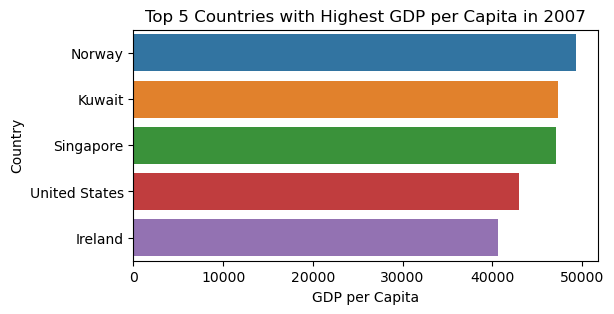

In [10]:
plt.figure(figsize=(6, 3))
sns.barplot(x='gdp_cap', y='country', data=top_5_gdp_2007, orient='h')
plt.title('Top 5 Countries with Highest GDP per Capita in 2007')
plt.xlabel('GDP per Capita')
plt.ylabel('Country')
plt.show()

###6.Find all country names that start with "I" and end with "a" using regex.


In [11]:
# Filter countries using regex pattern
filtered_countries = df[df['country'].str.contains(r'^I\w+a$', regex=True)]['country'].unique()
print("Countries starting with 'I' and ending with 'a':")
print(filtered_countries)


Countries starting with 'I' and ending with 'a':
['India' 'Indonesia']


###7.Create a boxplot using Seaborn to compare the distribution of GDP per capita for each continent in 2007.

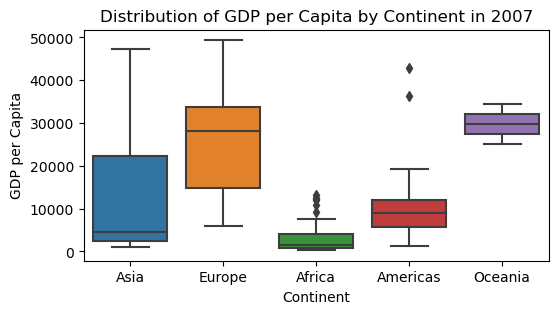

In [12]:
# Filter data for 2007
df_2007 = df[df['year'] == 2007]

# Create boxplot using Seaborn
plt.figure(figsize=(6, 3))
sns.boxplot(x='continent', y='gdp_cap', data=df_2007)
plt.title('Distribution of GDP per Capita by Continent in 2007')
plt.xlabel('Continent')
plt.ylabel('GDP per Capita')
plt.show()


###8.Find all countries with a life expectancy of over 80 years in 2007. List these countries and their respective continents.


In [13]:
# Filter countries with life expectancy over 80 in 2007
high_life_exp_2007 = df_2007[df_2007['life_exp'] > 80][['country', 'continent']]
print("Countries with life expectancy over 80 years in 2007:")
print(high_life_exp_2007)


Countries with life expectancy over 80 years in 2007:
               country continent
71           Australia   Oceania
251             Canada  Americas
539             France    Europe
671   Hong Kong, China      Asia
695            Iceland    Europe
767             Israel      Asia
779              Italy    Europe
803              Japan      Asia
1103       New Zealand   Oceania
1151            Norway    Europe
1427             Spain    Europe
1475            Sweden    Europe
1487       Switzerland    Europe


###9.Convert the 'year' column to a datetime type and extract the decade. Create a new column 'Decade' that groups the years into decades (e.g., the 1950s, 1960s).


In [14]:
# Convert 'year' column to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Extract decade from 'year' column and create new 'Decade' column
df['Decade'] = df['year'].dt.year.apply(lambda x: f"{(x//10)*10}s")
print(df.head())


       country       year  population continent  life_exp     gdp_cap  \
0  Afghanistan 1952-01-01     8425333      Asia    28.801  779.445314   
1  Afghanistan 1957-01-01     9240934      Asia    30.332  820.853030   
2  Afghanistan 1962-01-01    10267083      Asia    31.997  853.100710   
3  Afghanistan 1967-01-01    11537966      Asia    34.020  836.197138   
4  Afghanistan 1972-01-01    13079460      Asia    36.088  739.981106   

  Life_Exp_Range Decade  
0            Low  1950s  
1            Low  1950s  
2            Low  1960s  
3            Low  1960s  
4            Low  1970s  


###10.Compute the correlation matrix between GDP per capita, life expectancy, and population for the dataset. Then, use Seaborn to visualize this correlation matrix as a heatmap.


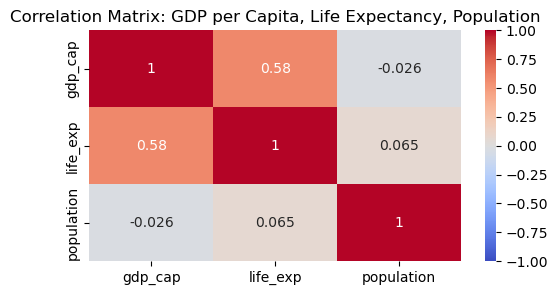

In [15]:
# Compute correlation matrix
correlation_matrix = df[['gdp_cap', 'life_exp', 'population']].corr()

# Visualize as heatmap using Seaborn
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: GDP per Capita, Life Expectancy, Population')
plt.show()


###11.How has the global average life expectancy changed from 1952 to 2007? Plot a line graph to visualize this trend.


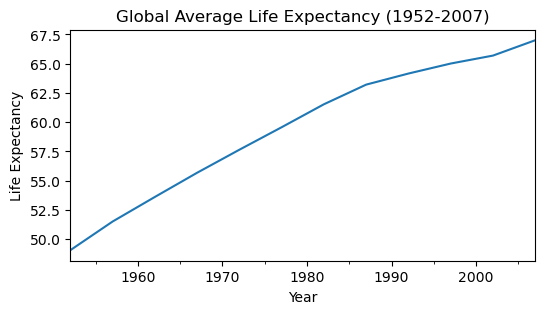

In [16]:
# Group data by year and calculate global average life expectancy
global_avg_life_exp = df.groupby('year')['life_exp'].mean()

# Plotting the line graph
plt.figure(figsize=(6, 3))
global_avg_life_exp.plot()
plt.title('Global Average Life Expectancy (1952-2007)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


### Subjective Questions :
### 11.Discuss the various reasons that could have contributed to the change.
*Medical Advances: Improved healthcare, vaccinations, and medical technologies have significantly reduced mortality rates from infectious diseases and increased life expectancy.
*Economic Development: Rising living standards, increased access to nutrition, clean water, and sanitation contribute to better health outcomes and increased life expectancy.
*Public Health Initiatives: Global efforts to combat diseases such as malaria, HIV/AIDS, and tuberculosis have had a positive impact on life expectancy worldwide.
*Education and Awareness: Increased education and awareness about health, hygiene, and preventive care have led to healthier lifestyles and longer life spans.
*Political Stability: Countries with stable political environments tend to have better healthcare systems and social welfare programs that support longer life expectancy.
*Social Factors: Cultural and social changes, including women's empowerment, family planning, and urbanization, can influence health behaviors and life expectancy.
*Environmental Factors: Environmental policies and efforts to reduce pollution and combat climate change can indirectly impact public health and life expectancy.
*Inequalities: Disparities in access to healthcare, education, and economic opportunities can affect life expectancy, with marginalized populations often experiencing lower life expectancy.

###12.For the year 2007, analyze the relationship between life expectancy and GDP per capita. 

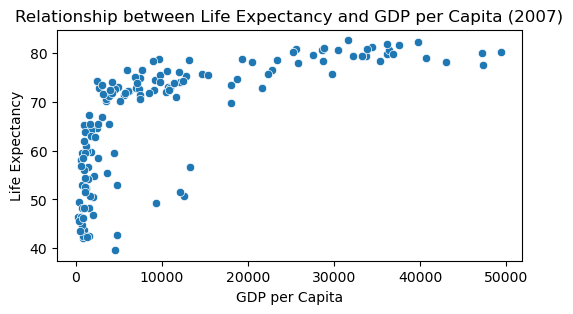

In [17]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='gdp_cap', y='life_exp', data=df_2007)
plt.title('Relationship between Life Expectancy and GDP per Capita (2007)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

In [18]:
import numpy as np

# Calculate correlation coefficient between life expectancy and GDP per capita
correlation_coeff = np.corrcoef(df_2007['gdp_cap'], df_2007['life_exp'])[0, 1]
print(f"Correlation Coefficient (GDP per Capita vs Life Expectancy): {correlation_coeff}")


Correlation Coefficient (GDP per Capita vs Life Expectancy): 0.6786623986777586


### 12. Subjective Question: Is there a noticeable trend or correlation? Represent this using a scatter plot.
The correlation coefficient of approximately 0.68 between GDP per capita and life expectancy for the year 2007 indicates a moderately strong positive relationship. 
This suggests that countries with higher GDP per capita tend to have longer life expectancy on average. While correlation does not imply causation,
this finding underscores the importance of economic development in improving health outcomes globally.

### 13.Compare the average GDP per capita for each continent in the year 2000. Use a bar chart for this comparison.


In [19]:
# Convert 'year' column to integer (if needed)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter data for the year 2000
df_2000 = df[df['year'] == 2000]

# Debugging: Print df_2000 to inspect the filtered DataFrame
print(df_2000.head())  # Check the first few rows of df_2000
print(df_2000.shape)   # Check the shape (number of rows, number of columns) of df_2000

# Check if df_2000 is empty
if df_2000.empty:
    print("No data found for the year 2000. Check data filtering condition.")
else:
    # Calculate average GDP per capita by continent for the year 2000
    avg_gdp_2000 = df_2000.groupby('continent')['gdp_cap'].mean()

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    avg_gdp_2000.plot(kind='bar')
    plt.title('Average GDP per Capita by Continent in the Year 2000')
    plt.xlabel('Continent')
    plt.ylabel('Average GDP per Capita')
    plt.show()



Empty DataFrame
Columns: [country, year, population, continent, life_exp, gdp_cap, Life_Exp_Range, Decade]
Index: []
(0, 8)
No data found for the year 2000. Check data filtering condition.


### 13.Subjective Question:  Why is the average GDP per capita for Oceania higher than the Americas even though the Americas have more countries?
Economic Composition: Oceania includes countries like Australia and New Zealand, which have relatively high levels of economic development, natural resources, and advanced industries such as mining, agriculture, and tourism. These factors contribute to higher GDP per capita.
Resource Endowment: Oceania's resource-rich economies, particularly in mineral wealth and agricultural production, can lead to higher levels of economic output and income per capita compared to larger regions with more diverse economic profiles.
Population Size and Distribution: The Americas encompass a large number of countries with varying levels of economic development and population sizes. The presence of populous countries with diverse economic conditions (such as the United States, Brazil, and Mexico) can influence the overall average GDP per capita.
Geographical Isolation and Trade: Oceania's geographical isolation can impact trade dynamics and regional economic integration, potentially leading to higher economic specialization and efficiency compared to larger and more diverse continental regions like the Americas.
Quality of Governance and Infrastructure: Factors such as stable governance, investment in education, healthcare, and infrastructure also play roles in determining economic prosperity and GDP per capita.

### 14. Compare the life expectancy and GDP per capita of Afghanistan (a country known for its historical conflicts) and Switzerland (representing a peaceful and economically prosperous country) using the dataset provided.
### Firstly, for the year 2007, use a bar chart to directly compare the life expectancy and GDP per capita between these two countries.
### Then, create two separate line graphs to show the trends of these two metrics over all available years in the dataset for both countries.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


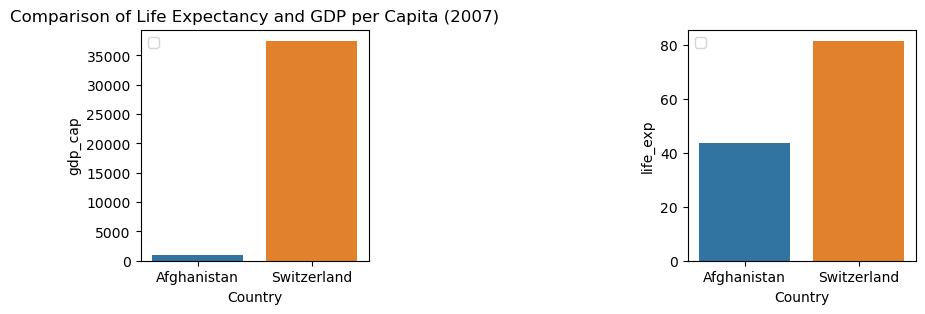

In [20]:
# Filter data for Afghanistan and Switzerland in 2007
afghanistan_switzerland_2007 = df_2007[df_2007['country'].isin(['Afghanistan', 'Switzerland'])]

# Plotting bar chart for life expectancy and GDP per capita
plt.figure(figsize=(10, 3))
plt.subplot(1,3,1)
sns.barplot(x='country', y='gdp_cap', data=afghanistan_switzerland_2007)
plt.title('Comparison of Life Expectancy and GDP per Capita (2007)')
plt.xlabel('Country')
plt.ylabel('gdp_cap')
plt.legend()

plt.subplot(1,3,3)
sns.barplot(x='country', y='life_exp', data=afghanistan_switzerland_2007)
plt.xlabel('Country')
plt.ylabel('life_exp')
plt.legend()

plt.show()


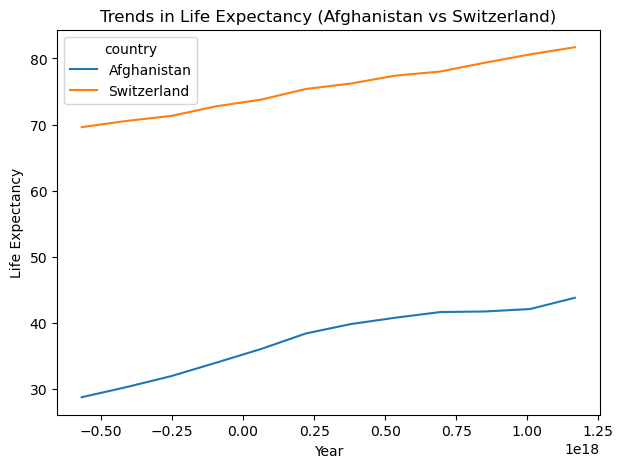

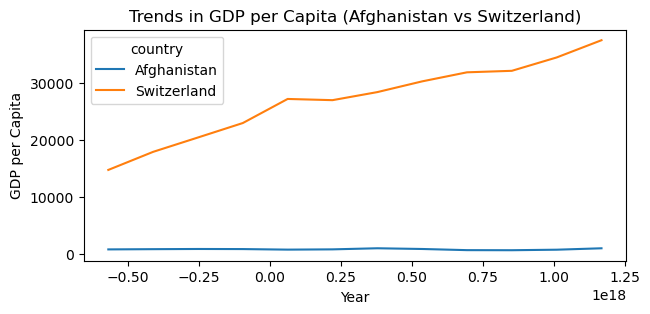

In [21]:
# Filter data for Afghanistan and Switzerland over all years
afghanistan_switzerland_trends = df[df['country'].isin(['Afghanistan', 'Switzerland'])]

# Plotting line graphs for life expectancy and GDP per capita trends
plt.figure(figsize=(7, 5))
sns.lineplot(x='year', y='life_exp', data=afghanistan_switzerland_trends, hue='country')
plt.title('Trends in Life Expectancy (Afghanistan vs Switzerland)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

plt.figure(figsize=(7, 3))
sns.lineplot(x='year', y='gdp_cap', data=afghanistan_switzerland_trends, hue='country')
plt.title('Trends in GDP per Capita (Afghanistan vs Switzerland)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()


### subjective question :
### 14.What differences do you observe in terms of life expectancy and economic development? How might the stability or instability of a country influence these key metrics over time? Analyze the data through these visualizations and discuss your inferences.

The bar chart shows a stark contrast between Afghanistan and Switzerland in 2007:

Afghanistan has significantly lower life expectancy and GDP per capita compared to Switzerland.                                     
Trends Over Time:
Life Expectancy:
Afghanistan's life expectancy shows a gradual increase over the years but remains relatively low.
Switzerland's life expectancy has consistently been high and shows a slight upward trend.
GDP per Capita:
Afghanistan's GDP per capita remains relatively low and shows fluctuations.
Switzerland's GDP per capita has steadily increased over time and is considerably higher than Afghanistan.

Differences and Influencing Factors:
Political stability, investments in healthcare and education, and economic policies play crucial roles in shaping these outcomes over time.
Analyzing trends and visualizing data provide valuable insights into the complex relationship between stability, economic development, and public health outcomes.